<a href="https://colab.research.google.com/github/benson1231/ComputerScience/blob/main/String_ppi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install py4cytoscape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.2 MB/s eta 0:00:00


In [18]:
#_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@1.11.0' # optional
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Loading Javascript client ... f8ed8ce4-85f5-404c-bcff-5ed7fa4e81f0 on https://jupyter-bridge.cytoscape.org
ADVICE: WHEN RUNNING UNDER COLAB, DO NOT RE-RUN THIS CELL WITHOUT MANUALLY EXECUTING Runtime | Factory Reset Runtime FROM THE COLAB MENU FIRST.


<IPython.core.display.Javascript object>

In [19]:
import requests

gene_list = ['TP53', 'EGFR', 'BRCA1', 'MYC', 'MDM2']
species = 9606  # human

response = requests.post(
    'https://string-db.org/api/json/network',
    data={'identifiers': '\r'.join(gene_list),
          'species': species}
)

ppi_data = response.json()
print(ppi_data)

[{'stringId_A': '9606.ENSP00000258149', 'stringId_B': '9606.ENSP00000418960', 'preferredName_A': 'MDM2', 'preferredName_B': 'BRCA1', 'ncbiTaxonId': '9606', 'score': 0.794, 'nscore': 0, 'fscore': 0, 'pscore': 0, 'ascore': 0, 'escore': 0, 'dscore': 0, 'tscore': 0.794}, {'stringId_A': '9606.ENSP00000258149', 'stringId_B': '9606.ENSP00000478887', 'preferredName_A': 'MDM2', 'preferredName_B': 'MYC', 'ncbiTaxonId': '9606', 'score': 0.813, 'nscore': 0, 'fscore': 0, 'pscore': 0, 'ascore': 0, 'escore': 0.221, 'dscore': 0, 'tscore': 0.77}, {'stringId_A': '9606.ENSP00000258149', 'stringId_B': '9606.ENSP00000275493', 'preferredName_A': 'MDM2', 'preferredName_B': 'EGFR', 'ncbiTaxonId': '9606', 'score': 0.897, 'nscore': 0, 'fscore': 0, 'pscore': 0, 'ascore': 0, 'escore': 0, 'dscore': 0.65, 'tscore': 0.718}, {'stringId_A': '9606.ENSP00000258149', 'stringId_B': '9606.ENSP00000269305', 'preferredName_A': 'MDM2', 'preferredName_B': 'TP53', 'ncbiTaxonId': '9606', 'score': 0.999, 'nscore': 0, 'fscore': 0,

In [20]:
import pandas as pd

edges = pd.DataFrame([{
    'source': x['preferredName_A'],
    'target': x['preferredName_B'],
    'score': x['score']
} for x in ppi_data])

nodes = pd.DataFrame({'id': pd.unique(edges[['source', 'target']].values.ravel())})
print(nodes.head())
print(edges.head())

      id
0   MDM2
1  BRCA1
2    MYC
3   EGFR
4   TP53
  source target  score
0   MDM2  BRCA1  0.794
1   MDM2    MYC  0.813
2   MDM2   EGFR  0.897
3   MDM2   TP53  0.999
4   TP53   EGFR  0.943


In [21]:
import py4cytoscape as p4c

p4c.create_network_from_data_frames(nodes=nodes, edges=edges, title="STRING PPI", collection="STRING network")
p4c.layout_network('force-directed')

DEBUG:py4...:Calling create_network_from_data_frames(nodes=      id
0   MDM2
1  BRCA1
2    MYC
3   EGFR
4   TP53, edges=  source target  score
0   MDM2  BRCA1  0.794
1   MDM2    MYC  0.813
2   MDM2   EGFR  0.897
3   MDM2   TP53  0.999
4   TP53   EGFR  0.943
5   TP53    MYC  0.997
6   TP53  BRCA1  0.999
7   EGFR  BRCA1  0.800
8   EGFR    MYC  0.875
9  BRCA1    MYC  0.999, title='STRING PPI', collection='STRING network')
DEBUG:py4...:ǀCalling cyrest_post('networks', parameters={'title': 'STRING PPI', 'collection': 'STRING network'}, body={'data': [{'name': 'STRING PPI'}], 'elements': {'nodes': [{'data': {'id': 'MDM2'}}, {'data': {'id': 'BRCA1'}}, {'data': {'id': 'MYC'}}, {'data': {'id': 'EGFR'}}, {'data': {'id': 'TP53'}}], 'edges': [{'data': {'name': 'MDM2 (interacts with) BRCA1', 'source': 'MDM2', 'target': 'BRCA1', 'interaction': 'interacts with'}}, {'data': {'name': 'MDM2 (interacts with) MYC', 'source': 'MDM2', 'target': 'MYC', 'interaction': 'interacts with'}}, {'data': {'name': 'MD

Applying default style...


DEBUG:py4...:ǀOK[200], content: {
 "data": {"views":[
  248
]},
 "errors":[]
}
DEBUG:py4...:ǀReturning 'commands_post': {'views': [248]}
DEBUG:py4...:ǀCalling layout_network(network=128, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀCalling get_network_suid(128, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀCalling cyrest_get('networks', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀHTTP GET(http://127.0.0.1:1234/v1/networks)


Applying preferred layout


DEBUG:py4...:ǀǀǀOK[200], content: [128]
DEBUG:py4...:ǀǀǀReturning 'cyrest_get': [128]
DEBUG:py4...:ǀǀReturning 'get_network_suid': 128
DEBUG:py4...:ǀǀCalling commands_post('layout apply preferred networkSelected="SUID:128"', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀHTTP POST(http://127.0.0.1:1234/v1/commands/layout/apply%20preferred), json: {'networkSelected': 'SUID:128'}
DEBUG:py4...:ǀǀOK[200], content: {
 "data": {},
 "errors":[]
}
DEBUG:py4...:ǀǀReturning 'commands_post': {}
DEBUG:py4...:ǀReturning 'layout_network': {}
DEBUG:py4...:Returning 'create_network_from_data_frames': 128
DEBUG:py4...:--------------------
DEBUG:py4...:Calling layout_network('force-directed')
DEBUG:py4...:ǀCalling get_network_suid(None, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀCalling commands_post('network get attribute network="current" namespace="default" columnList="SUID"', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀHTTP POST(http://127.0.0.1:1234/v1/commands/network/get%20a

{}

In [22]:
# 假設你有 logFC 資料
logfc_dict = {'TP53': 2.1, 'EGFR': 1.8, 'BRCA1': 0.9, 'MYC': 2.4, 'MDM2': 1.2}
logfc_df = pd.DataFrame({'id': list(logfc_dict.keys()), 'logFC': list(logfc_dict.values())})

# 將 logFC 資訊匯入 Cytoscape 的 node table
p4c.load_table_data(logfc_df, data_key_column='id')
p4c.get_table_columns('node')

DEBUG:py4...:Calling load_table_data(      id  logFC
0   TP53    2.1
1   EGFR    1.8
2  BRCA1    0.9
3    MYC    2.4
4   MDM2    1.2, data_key_column='id')
DEBUG:py4...:ǀCalling get_network_suid(None, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀCalling commands_post('network get attribute network="current" namespace="default" columnList="SUID"', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀHTTP POST(http://127.0.0.1:1234/v1/commands/network/get%20attribute), json: {'network': 'current', 'namespace': 'default', 'columnList': 'SUID'}
DEBUG:py4...:ǀǀOK[200], content: {
 "data": [ {
  "SUID": 128
}
],
 "errors":[]
}
DEBUG:py4...:ǀǀReturning 'commands_post': [{'SUID': 128}]
DEBUG:py4...:ǀReturning 'get_network_suid': 128
DEBUG:py4...:ǀCalling get_table_columns(table='node', namespace='default', columns='name', network=128, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀCalling get_network_suid(128, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀCalling cyrest_get('

,SUID,shared name,name,selected,id,logFC
155,155,MDM2,MDM2,False,MDM2,1.2
162,162,BRCA1,BRCA1,False,BRCA1,0.9
165,165,MYC,MYC,False,MYC,2.4
168,168,EGFR,EGFR,False,EGFR,1.8
171,171,TP53,TP53,False,TP53,2.1


In [23]:
p4c.set_node_color_mapping(
    table_column='logFC',
    table_column_values=[0.5, 1.5, 2.5],
    colors=['#ffffcc', '#fc8d59', '#d73027'],
    mapping_type='c',  # 'c' = continuous
    default_color='#d3d3d3',
    style_name='default'
)

DEBUG:py4...:Calling set_node_color_mapping(table_column='logFC', table_column_values=[0.5, 1.5, 2.5], colors=['#ffffcc', '#fc8d59', '#d73027'], mapping_type='c', default_color='#d3d3d3', style_name='default')
DEBUG:py4...:ǀCalling set_node_color_default('#d3d3d3', 'default', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀCalling set_visual_property_default({'visualProperty': 'NODE_FILL_COLOR', 'value': '#d3d3d3'}, 'default', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀCalling cyrest_put('styles/default/defaults', body=[{'visualProperty': 'NODE_FILL_COLOR', 'value': '#d3d3d3'}], base_url='http://127.0.0.1:1234/v1', require_json=False)
DEBUG:py4...:ǀǀǀHTTP PUT(http://127.0.0.1:1234/v1/styles/default/defaults), json: [{'visualProperty': 'NODE_FILL_COLOR', 'value': '#d3d3d3'}]
DEBUG:py4...:ǀǀǀOK[200], content: 
DEBUG:py4...:ǀǀǀReturning 'cyrest_put': ''
DEBUG:py4...:ǀǀReturning 'set_visual_property_default': ''
DEBUG:py4...:ǀReturning 'set_node_color_default': ''
DEBUG:py4..

''

DEBUG:py4...:Calling notebook_export_show_image()
DEBUG:py4...:ǀCalling export_image(filename='image.png', type='PNG', resolution=None, units=None, height=None, width=None, zoom=None, network=None, base_url='http://127.0.0.1:1234/v1', overwrite_file=True)
DEBUG:py4...:ǀǀCalling get_network_view_suid(None, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀCalling get_network_views(None, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀǀCalling get_network_suid(None, base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀǀǀCalling commands_post('network get attribute network="current" namespace="default" columnList="SUID"', base_url='http://127.0.0.1:1234/v1')
DEBUG:py4...:ǀǀǀǀǀHTTP POST(http://127.0.0.1:1234/v1/commands/network/get%20attribute), json: {'network': 'current', 'namespace': 'default', 'columnList': 'SUID'}
DEBUG:py4...:ǀǀǀǀǀOK[200], content: {
 "data": [ {
  "SUID": 128
}
],
 "errors":[]
}
DEBUG:py4...:ǀǀǀǀǀReturning 'commands_post': [{'SUID': 128}]
DEBUG:py4...:ǀǀǀǀRe

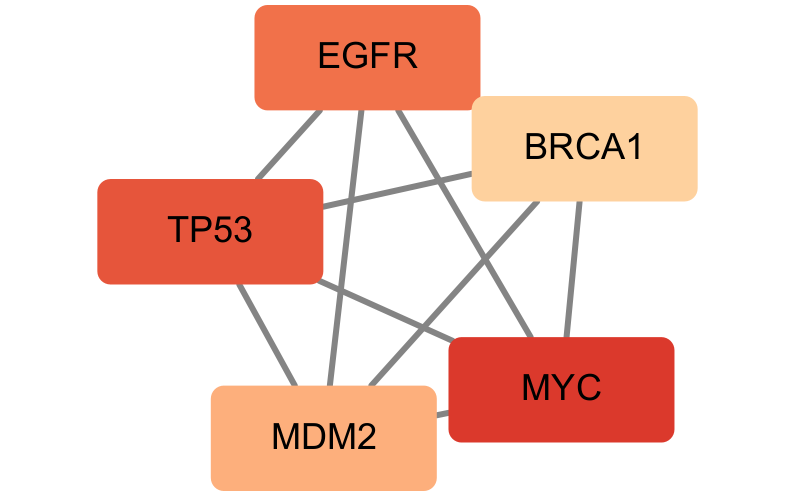

In [24]:
# 在成功建立網路與套用 layout 後使用
p4c.notebook_export_show_image()